### Analyse the Publications data from Kenya

So we managed to download about 25,000 paper abstracts with meta-data from Kenyan Authors. Now we need to makse sense of these data and identify trends. We are asking questions like:

1. Changes in the number of papers published over time (Yearly)
2. Changes in the number of open acces papers over the years (Keep in mind that access of the lack thereof maybe linked to embargo periods)
3. Colaboration trends (How can we get this information?
4. What else can we find out?

#### First we'll load the required modules

In [1]:
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

#### Then import the data

In [2]:
data = pd.read_csv('../Data/PMID_PMC_Journal_Year.csv', index_col='pmid')

In [3]:
data.head()

,pmcid,isopen,journal,date,year,month
pmid,,,,,,
30157877,PMC6114501,open,Reprod Health,2018-08-29,2018.0,8.0
30165703,NaN,closed,J Infect Dis,2018-08-24,2018.0,8.0
30165548,NaN,closed,J Infect Dis,2018-08-27,2018.0,8.0
30165370,PMC6117160,open,PLoS One,2018-08-30,2018.0,8.0
30161172,PMC6116983,open,PLoS One,2018-08-30,2018.0,8.0


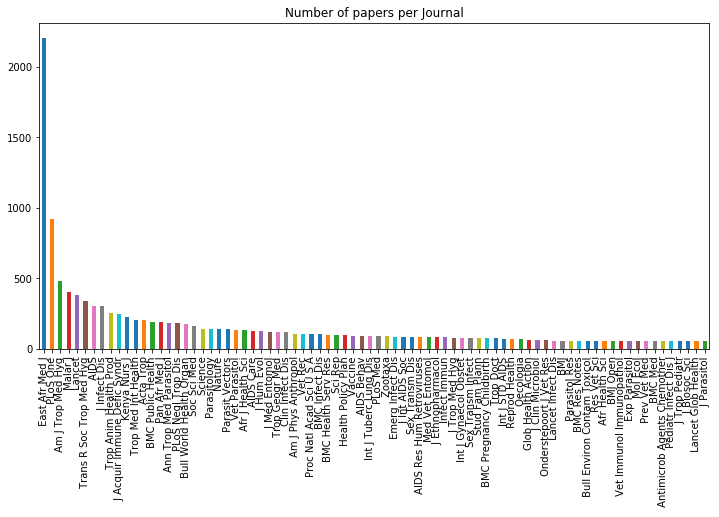

In [4]:
plot_journals = data.journal.value_counts()[data.journal.value_counts() > 50]
plot_journals.plot(kind='bar', title='Number of papers per Journal', figsize=(12, 6))
plt.savefig('../plots/papers_per_jornal.png')  # saves the current figure

From the figure above, we can observe that the East Africa Medical Journal is by far the most popular follwed by Plos One Journal for Kenyan Authors. This is followed in a distant second by Malaria Journal. Most of these are journals specific to the diseases affecting Africa: Malaria and Negelected Tropical dieseases. 


### Number of Journals per Year

Now we need to check if the number of Journals Published By Kenyans over the years. 

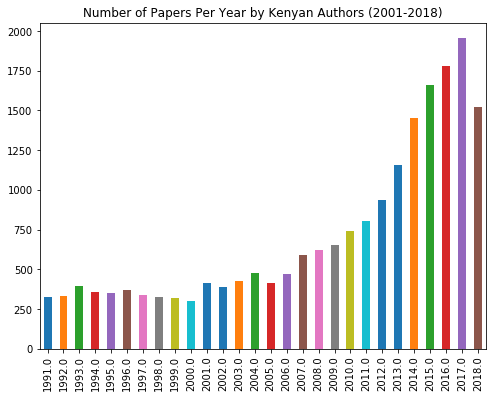

In [6]:
data[(data.year > 1990) & (data.year < 2019)]['year'].\
value_counts().sort_index().plot(kind='bar',
                                 title='Number of Papers Per Year by Kenyan Authors (2001-2018)',
                                 figsize=(8, 6))
plt.savefig('../plots/papers_per_year2.png')  # saves the current figure

Either we are missing some data or there was a drastic increase in the number of papers published by Kenyan authors after 2007. Why? Turns out the data was not correctly captured in our initial analysis

#### Are the published papers openly accessible?

Having established the